
---

Program ini bertujuan untuk menganalisis data guna menyelesaikan problem statement yang telah ditetapkan. Proses analisis dimulai dengan eksplorasi data, dilanjutkan dengan pembersihan data, dan diakhiri dengan analisis mendalam.
Pada tahap eksplorasi data, dilakukan identifikasi kolom-kolom data, tipe data, serta konten dari setiap kolom. Pembersihan data melibatkan konversi format data ke tipe yang sesuai dan penanganan nilai yang hilang. Setelah data siap, analisis dilakukan dengan menggunakan visualisasi data, perhitungan statistik deskriptif, dan analisis statistik inferensial. Hasil dari analisis ini kemudian disimpulkan dan digunakan untuk memberikan rekomendasi.


Link Tableau:

https://public.tableau.com/views/DataVisualizationVideoGameSales/VisualisasiData?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

---


# **Identifikasi Masalah**

## Latar Belakang

> <p align = "justify">Industri video game berkembang pesat, dengan berbagai platform dan genre menawarkan beragam pilihan bagi para gamer. Namun, meski ada banyak peluang, tidak semua wilayah dan genre mengalami kesuksesan yang sama. Beberapa wilayah seperti dan genre tertentu mungkin tidak mendapatkan perhatian yang cukup dalam strategi pemasaran dan distribusi. Dengan memanfaatkan data penjualan yang ada, kita bisa memahami pola dan tren di masing-masing wilayah dan genre.</p>

## Topik Permasalahan

> Meningkatan Penjualan Video Game di Wilayah dan Genre yang Kurang Optimal berdasarkan platform, genre, dan wilayah.

## Problem Statement

**Specific**: Meningkatkan strategi pemasaran untuk video game dengan memahami pola penjualan di berbagai wilayah dan genre.

**Measurable**: Menargetkan peningkatan penjualan sebesar 20% di wilayah dengan penjualan terendah.

**Achievable**: Menggunakan analisis data penjualan berdasarkan platform, genre, dan wilayah untuk mengidentifikasi peluang pasar.

**Relevant**: Fokus pada penyesuaian strategi pemasaran untuk meningkatkan penjualan di wilayah yang kurang optimal dan memaksimalkan potensi genre yang populer.

**Time-Bound**: Mencapai peningkatan penjualan dalam waktu enam bulan.



> Meningkatkan penjualan sebesar 20% di wilayah dengan penjualan terendah dalam enam bulan melalui analisis data penjualan berdasarkan platform, genre, dan wilayah untuk mengidentifikasi peluang pasar dan menyusun strategi pemasaran yang lebih efektif.

## Penjabaran Masalah
> Masalah Utama: Bagaimana cara mengoptimalkan penjualan video game di wilayah dan genre yang saat ini memiliki kinerja penjualan rendah

Untuk mempermudah analisis dan menyelesaikan masalah ini, kita perlu memahami rincian tentang masalah tersebut. Untuk itu, kita akan menggunakan kerangka 5W+1H.

- Apa genre video game yang memiliki penjualan paling rendah di setiap wilayah?
- Apa platform video game yang memiliki penjualan tertinggi di setiap wilayah?
- Di mana wilayah dengan penjualan video game paling rendah?
- Kapan penjualan video game menunjukkan penurunan atau peningkatan signifikan di wilayah atau genre tertentu?
- Bagaimana Cetral Tendency penjualan video game di setiap wilayah?
- Apakah terdapat perbedaan dalam penjualan video game antara wilayah Amerika Utara (NA) dan Eropa (EU)?



# **Data Loading**


## Source Dataset

Dataset diambil dari platform `Kaggle`.

> https://www.kaggle.com/datasets/ulrikthygepedersen/video-games-sales

## Data Dictionary

Memberikan deskripsi rinci mengenai setiap kolom dalam dataset video game:

| **Kolom**       | **Deskripsi**                                                            |
|-----------------|--------------------------------------------------------------------------|
| `rank`          | Posisi atau peringkat video game berdasarkan total penjualan globalnya. |
| `name`          | Nama video game.                                                          |
| `platform`      | Platform tempat video game tersebut dirilis, seperti PlayStation, Xbox, Wii, dll. |
| `year`          | Tahun rilis video game.                                                   |
| `genre`         | Genre video game, seperti Action, Adventure, Sports, dll.                 |
| `publisher`     | Nama penerbit video game.                                                 |
| `na_sales`      | Total penjualan video game di Amerika Utara (dalam juta unit).            |
| `eu_sales`      | Total penjualan video game di Eropa (dalam juta unit).                    |
| `jp_sales`      | Total penjualan video game di Jepang (dalam juta unit).                   |
| `other_sales`   | Total penjualan video game di wilayah lain (dalam juta unit).             |
| `global_sales`  | Total penjualan video game secara global (dalam juta unit). 

## Import Library

In [1]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Import dataset
df = pd.read_csv('video_games_sales.csv')

## Check Data Info

In [3]:
# Menampilkan 5 data teratas
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Mengecek Informasi dari data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


- Data terdiri dari 16598 entries dan 11 columns
- Terdapat nilai null di kolom year dan juga publisher
- Tipe data untuk kolom year tidak sesuai

# **Data Cleaning**

## Check And Handling Null Values

In [5]:
# Mengecek apakah dalam data terdapat null values
df.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [6]:
# Menghapus baris yang memiliki nilai null pada kolom 'year'
df = df.dropna(subset=['year'])

# Mengganti nilai null pada kolom 'publisher' dengan string 'Unknown'
df['publisher'].fillna('Unknown', inplace=True)

C:\Users\Khalil\AppData\Local\Temp\ipykernel_16660\1579126567.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['publisher'].fillna('Unknown', inplace=True)


In [7]:
# Memastikan null value sudah terhapus
df.isnull().sum()

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

## Check Duplicate Data

In [8]:
# Cek data duplikat
df.duplicated().sum()

0

Tidak ada data yang duplikat

## Change Data Types

In [9]:
# cek tipe data semua kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16327 non-null  int64  
 1   name          16327 non-null  object 
 2   platform      16327 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16327 non-null  object 
 5   publisher     16327 non-null  object 
 6   na_sales      16327 non-null  float64
 7   eu_sales      16327 non-null  float64
 8   jp_sales      16327 non-null  float64
 9   other_sales   16327 non-null  float64
 10  global_sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
# Mengubah tipe data kolom year ke int
df['year'] = df['year'].astype(int)

In [11]:
# Memastikan tipe data sudah berubah
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16327 non-null  int64  
 1   name          16327 non-null  object 
 2   platform      16327 non-null  object 
 3   year          16327 non-null  int32  
 4   genre         16327 non-null  object 
 5   publisher     16327 non-null  object 
 6   na_sales      16327 non-null  float64
 7   eu_sales      16327 non-null  float64
 8   jp_sales      16327 non-null  float64
 9   other_sales   16327 non-null  float64
 10  global_sales  16327 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


**Save data ke csv setelah dibersihkan**

In [12]:
# Save data ke CSV
df.to_csv('video_games_sales_cleaned.csv', index=False)

# **Analisis dan Perhitungan**

Pada bagian ini berisi proses analisis beserta insight yang menjawab penjabaran masalahnya

## Apa platform video game yang memiliki penjualan Tertinggi di setiap wilayah?

In [33]:
platform_sales_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_other = df.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5)

print (platform_sales_na.round(0))
print (platform_sales_eu.round(0))
print (platform_sales_jp.round(0))
print (platform_sales_other.round(0))

platform
X360    594.0
PS2     573.0
Wii     497.0
PS3     389.0
DS      389.0
Name: na_sales, dtype: float64
platform
PS3     340.0
PS2     333.0
X360    278.0
Wii     264.0
PS      212.0
Name: eu_sales, dtype: float64
platform
DS      175.0
PS      140.0
PS2     138.0
SNES    117.0
NES      99.0
Name: jp_sales, dtype: float64
platform
PS2     190.0
PS3     141.0
X360     85.0
Wii      79.0
DS       60.0
Name: other_sales, dtype: float64


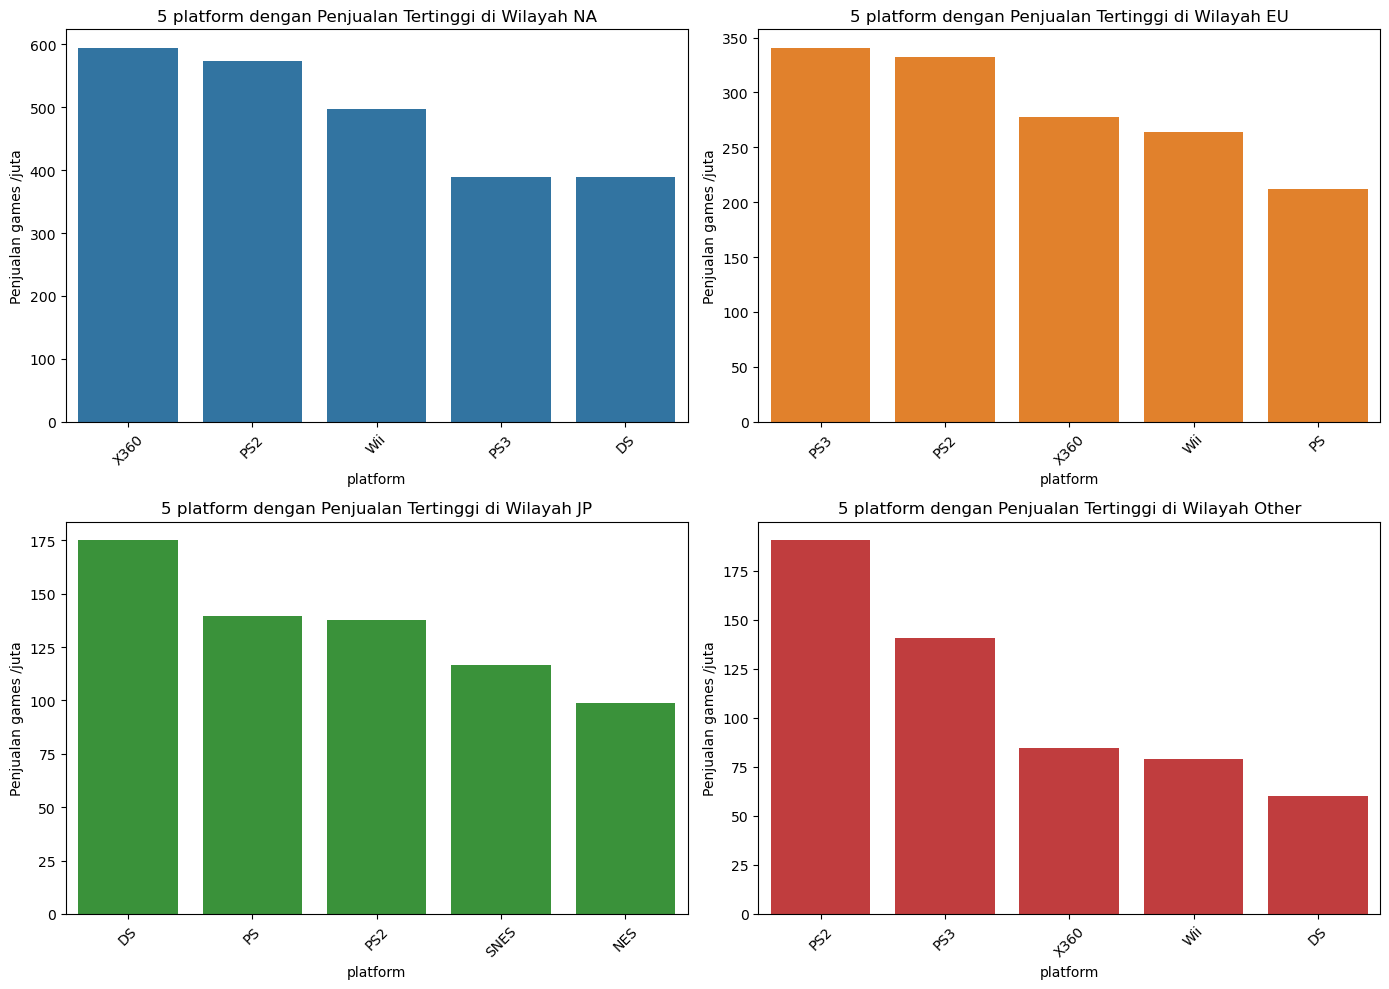

In [13]:
# Menentukan warna untuk setiap wilayah
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Menghitung total penjualan per genre untuk setiap wilayah
platform_sales_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_other = df.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5)

# Plot 5 penjualan Tertinggi berdasarkan genre di region NA (North America)
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.barplot(x=platform_sales_na.index, y=platform_sales_na.values, color=colors[0])
plt.xticks(rotation=45)
plt.title('5 platform dengan Penjualan Tertinggi di Wilayah NA')
plt.xlabel('platform')
plt.ylabel('Penjualan games /juta')

# Plot 5 penjualan Tertinggi berdasarkan platform di region EU (Europe)
plt.subplot(2, 2, 2)
sns.barplot(x=platform_sales_eu.index, y=platform_sales_eu.values, color=colors[1])
plt.xticks(rotation=45)
plt.title('5 platform dengan Penjualan Tertinggi di Wilayah EU')
plt.xlabel('platform')
plt.ylabel('Penjualan games /juta')

# Plot 5 penjualan Tertinggi berdasarkan platform di region JP (Japan)
plt.subplot(2, 2, 3)
sns.barplot(x=platform_sales_jp.index, y=platform_sales_jp.values, color=colors[2])
plt.xticks(rotation=45)
plt.title('5 platform dengan Penjualan Tertinggi di Wilayah JP')
plt.xlabel('platform')
plt.ylabel('Penjualan games /juta')

# Plot 5 penjualan Tertinggi berdasarkan platform di region OTHER
plt.subplot(2, 2, 4)
sns.barplot(x=platform_sales_other.index, y=platform_sales_other.values, color=colors[3])
plt.xticks(rotation=45)
plt.title('5 platform dengan Penjualan Tertinggi di Wilayah Other')
plt.xlabel('platform')
plt.ylabel('Penjualan games /juta')

plt.tight_layout()
plt.show()

Insight:

- Region NA
    - Platform dengan penjualan tertinggi adalah Xbox 360, diikuti oleh PS2 dan Wii.
    - Ini menunjukkan bahwa Xbox 360 sangat populer di wilayah ini, meskipun PS2 dan Wii juga memiliki pangsa pasar yang signifikan.

- Region EU
    - PS3 dan PS2 mendominasi pasar dengan penjualan yang hampir setara, menunjukkan preferensi yang kuat terhadap platform PlayStation di Eropa
    - Ini menunjukkan bahwa meskipun populer, masih tertinggal dibandingkan platform PlayStation.

- Region JP
    - DS adalah platform yang paling banyak terjual, menunjukkan popularitas yang sangat tinggi di Jepang. 
    - PS dan PS2 juga memiliki pangsa pasar yang signifikan, namun menarik bahwa platform lama seperti SNES dan NES masih tetap populer.

- Region Other
    - PS2 menempati posisi teratas, diikuti oleh PS3 dan Xbox 360
    - Ini mengindikasikan bahwa PlayStation memiliki pengaruh global yang kuat di luar wilayah utama seperti Amerika Utara, Eropa, dan Jepang.


## Apa genre video game yang memiliki penjualan tertinggi di setiap wilayah?

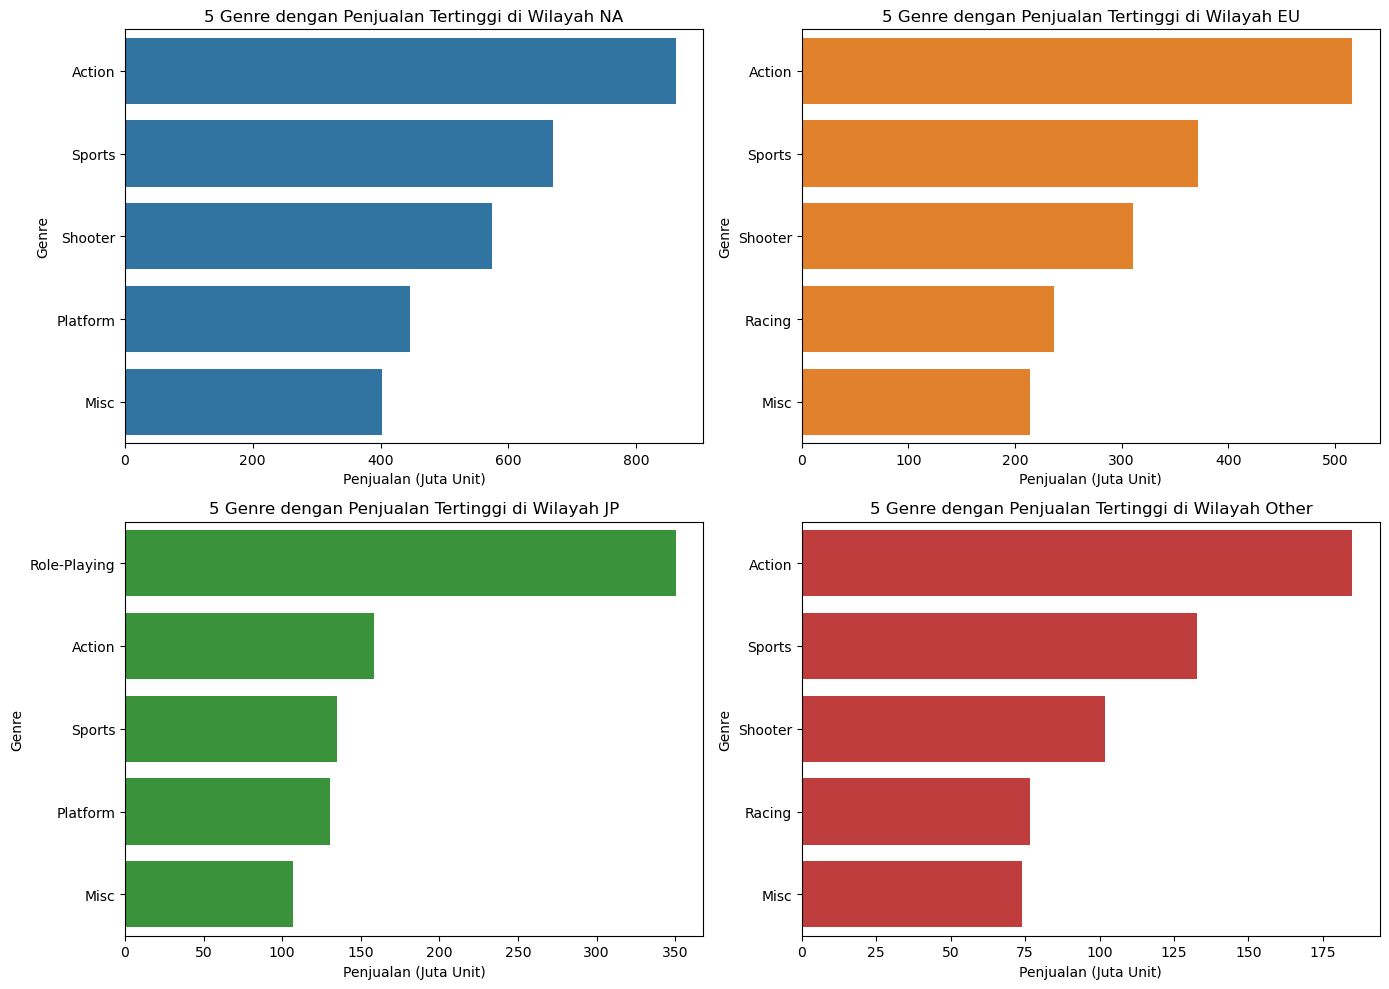

In [14]:
# Menentukan warna untuk setiap wilayah
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Menghitung total penjualan per genre untuk setiap wilayah
genre_sales_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
genre_sales_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
genre_sales_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
genre_sales_other = df.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head()

# Plot penjualan tertinggi berdasarkan genre di wilayah NA (North America)
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.barplot(x=genre_sales_na.values, y=genre_sales_na.index, color=colors[0], orient='h')
plt.title('5 Genre dengan Penjualan Tertinggi di Wilayah NA')
plt.xlabel('Penjualan (Juta Unit)')
plt.ylabel('Genre')

# Plot penjualan tertinggi berdasarkan genre di wilayah EU (Europe)
plt.subplot(2, 2, 2)
sns.barplot(x=genre_sales_eu.values, y=genre_sales_eu.index, color=colors[1], orient='h')
plt.title('5 Genre dengan Penjualan Tertinggi di Wilayah EU')
plt.xlabel('Penjualan (Juta Unit)')
plt.ylabel('Genre')

# Plot penjualan tertinggi berdasarkan genre di wilayah JP (Japan)
plt.subplot(2, 2, 3)
sns.barplot(x=genre_sales_jp.values, y=genre_sales_jp.index, color=colors[2], orient='h')
plt.title('5 Genre dengan Penjualan Tertinggi di Wilayah JP')
plt.xlabel('Penjualan (Juta Unit)')
plt.ylabel('Genre')

# Plot penjualan tertinggi berdasarkan genre di wilayah OTHER
plt.subplot(2, 2, 4)
sns.barplot(x=genre_sales_other.values, y=genre_sales_other.index, color=colors[3], orient='h')
plt.title('5 Genre dengan Penjualan Tertinggi di Wilayah Other')
plt.xlabel('Penjualan (Juta Unit)')
plt.ylabel('Genre')

plt.tight_layout()
plt.show()

Insight :
- Region NA
    - Genre Action mendominasi pasar dengan penjualan tertinggi, diikuti oleh Sports dan Shooter.
    - Penjualan genre Platform dan Misc juga cukup signifikan, namun jauh di bawah Action.
    - Ini menunjukkan bahwa game bergenre Action dan Shooter lebih populer di Amerika Utara.
- Region EU
    - Mirip dengan Amerika Utara, genre Action juga menjadi yang teratas di Eropa.
    - Diikuti oleh Sports dan Shooter dengan penjualan yang cukup signifikan.
    - Genre Racing juga menunjukkan popularitas yang cukup tinggi di wilayah ini.
- Region JP
    - Berbeda dari wilayah lain, Role-Playing menjadi genre paling populer di Jepang, diikuti oleh Action.
    - Sports dan Platform juga menempati posisi teratas, namun penjualan tidak sekuat genre Role-Playing.
    - Ini menunjukkan preferensi yang berbeda di Jepang, di mana game dengan elemen naratif lebih diminati.
- Region Other
    - Genre Action kembali menjadi yang paling populer, dengan penjualan tertinggi di luar wilayah utama lainnya.
    - Genre Sports dan Shooter juga cukup populer di wilayah ini.
    - Secara umum, genre yang populer di wilayah lain juga mendapat tempat di wilayah "Other".

## Di mana wilayah dengan penjualan video game paling rendah? 

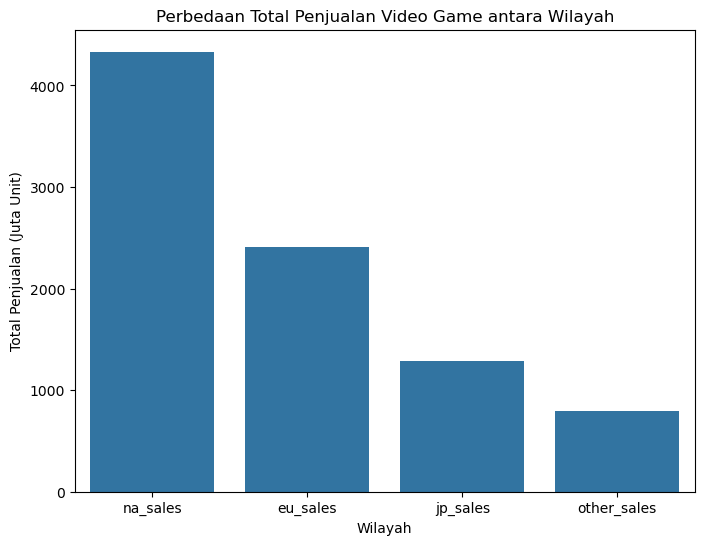

In [15]:
# Menghitung total penjualan untuk setiap wilayah
total_sales_by_region = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Mengonversi hasil ke DataFrame untuk visualisasi
sales_df = pd.DataFrame(total_sales_by_region, columns=['Total Sales']).reset_index()
sales_df.columns = ['Region', 'Total Sales']

# Plot perbedaan penjualan antara wilayah
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Total Sales', data=sales_df, color='#1f77b4')
plt.title('Perbedaan Total Penjualan Video Game antara Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Total Penjualan (Juta Unit)')
plt.show()

Insight:
- Wilayah Other memiliki total penjualan terendah, menunjukkan bahwa pasar utama untuk video game adalah di Amerika Utara dan Eropa.

## Kapan penjualan video game menunjukkan penurunan atau peningkatan signifikan di wilayah atau genre tertentu?

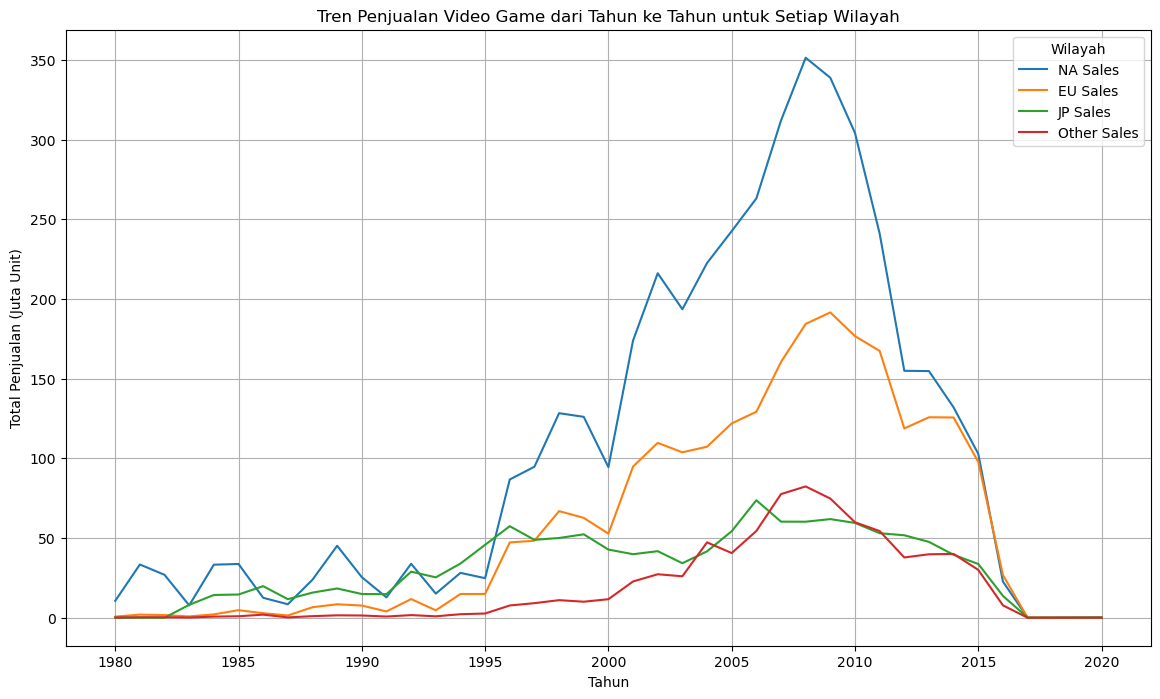

In [16]:
# Menghitung total penjualan per tahun untuk setiap wilayah
sales_trend_na = df.groupby('year')['na_sales'].sum()
sales_trend_eu = df.groupby('year')['eu_sales'].sum()
sales_trend_jp = df.groupby('year')['jp_sales'].sum()
sales_trend_other = df.groupby('year')['other_sales'].sum()

# Plot tren penjualan dari tahun ke tahun untuk setiap wilayah
plt.figure(figsize=(14, 8))
plt.plot(sales_trend_na.index, sales_trend_na.values, label='NA Sales', color='#1f77b4')
plt.plot(sales_trend_eu.index, sales_trend_eu.values, label='EU Sales', color='#ff7f0e')
plt.plot(sales_trend_jp.index, sales_trend_jp.values, label='JP Sales', color='#2ca02c')
plt.plot(sales_trend_other.index, sales_trend_other.values, label='Other Sales', color='#d62728')

plt.title('Tren Penjualan Video Game dari Tahun ke Tahun untuk Setiap Wilayah')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan (Juta Unit)')
plt.legend(title='Wilayah')
plt.grid(True)
plt.show()

Insight :
- Penjualan video game mencapai puncaknya pada periode 2005-2010 di semua wilayah, terutama di NA.
- Setelah puncaknya, terjadi penurunan yang signifikan dalam penjualan di semua wilayah, menunjukkan mungkin adanya perubahan tren atau preferensi di pasar.
- Tren penurunan ini konsisten di semua wilayah, meskipun pada tahun-tahun awal, penjualan di wilayah NA dan EU mengalami peningkatan tajam.

## Bagaimana Cetral Tendency penjualan video game di setiap wilayah?

Analisis menggunakan Central Tendency dilakukan untuk mendapatkan pemahaman yang lebih lengkap dan seimbang tentang pola penjualan video game di setiap wilayah, agar dapat menentukan strategi pemasaran, dan pengembangan produk yang sesuai dengan preferensi pasar yang berbeda di setiap wilayah.

In [17]:
# Menghitung Central Tendency (Mean, Median) untuk setiap wilayah
central_tendency = pd.DataFrame({
    'Region': ['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales'],
    'Mean': [df['na_sales'].mean(), df['eu_sales'].mean(), df['jp_sales'].mean(), df['other_sales'].mean()],
    'Median': [df['na_sales'].median(), df['eu_sales'].median(), df['jp_sales'].median(), df['other_sales'].median()]
})

# Menampilkan hasil dalam satu tabel
print("Central Tendency Penjuaalan Video Game di Setiap Wilayah:")
central_tendency

Central Tendency Penjuaalan Video Game di Setiap Wilayah:


,Region,Mean,Median
0,NA Sales,0.265415,0.08
1,EU Sales,0.147554,0.02
2,JP Sales,0.078661,0.00
3,Other Sales,0.048325,0.01


Insight:
- Amerika Utara (NA): Memiliki rata-rata penjualan tertinggi (0.265) dan median (0.08), menunjukkan performa penjualan terbaik dibandingkan wilayah lain.
- Eropa (EU): Rata-rata penjualan (0.148) dan median (0.02) berada di tengah, menandakan performa penjualan moderat.
- Jepang (JP): Menunjukkan rata-rata (0.079) dan median (0.00) penjualan terendah, menunjukkan pasar yang kurang 
menguntungkan untuk video game.
- Wilayah Lain (Other Sales): Memiliki rata-rata (0.048) dan median (0.01) penjualan terendah, menunjukkan potensi pasar yang sangat kecil.

##  Apakah terdapat perbedaan dalam penjualan video game antara wilayah Amerika Utara (NA) dan Eropa (EU)?

Hipotesis

>**Hipotesis Nol (H₀):** rata-rata penjualan video game wilayah Amerika Utara (NA) == rata-rata penjualan video game  Eropa (EU) 

>**Hipotesis Alternatif (H₁):** rata-rata penjualan video game wilayah Amerika Utara (NA) =! rata-rata penjualan video game Eropa (EU) 


Uji t two sampel independent digunakan karena kita ingin membandingkan rata-rata penjualan video game antara dua wilayah yang berbeda, yaitu Amerika Utara (NA) dan Eropa (EU), di mana data dari kedua wilayah dianggap independen.

Uji dilakukan pada tingkat signifikansi 5% (α = 0.05).

In [18]:
# Mengambil data penjualan di wilayah Amerika Utara dan Eropa
na_sales = df['na_sales']
eu_sales = df['eu_sales']

# Melakukan uji t dua sampel independen
t_stat, p_value = stats.ttest_ind(na_sales, eu_sales)

# Menampilkan hasil
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")


t-statistic: 15.58
p-value: 0.0000


>Jika p-value = 0.0000, Artinya, ada bukti yang sangat kuat untuk menolak hipotesis nol (H₀). Dapat disimpulkan bahwa nilai rata rata penjualan video game di wilayah NA tidak saama dengan nilai rata rata penjualan video game di wilayah EU.

# Pengambilan Kesimpulan

## Kesimpulan Hasil Analisis

Dari hasil analisis didapatkan:

1. Di region Amerika Utara (NA) menunjukkan performa penjualan terbaik dengan rata-rata dan median penjualan tertinggi dibandingkan wilayah lain. Xbox 360 menjadi platform yang paling populer, diikuti oleh PS2 dan Wii. Genre Action mendominasi pasar, diikuti oleh Sports dan Shooter. Ini menandakan bahwa pasar video game di NA sangat kuat, dengan preferensi yang jelas terhadap game bergenre Action dan platform Xbox 360.
2. Di region Eropa (EU) menempati posisi kedua dengan performa penjualan moderat. Platform PS3 dan PS2 mendominasi pasar, menunjukkan preferensi kuat terhadap PlayStation. Genre Action juga menjadi yang teratas di Eropa, diikuti oleh Sports dan Shooter. Ini mengindikasikan bahwa meskipun EU memiliki preferensi yang serupa dengan NA, pasar ini sedikit lebih terfokus pada platform PlayStation.
3. Di region Jepang (JP) memiliki rata-rata dan median penjualan terendah, menunjukkan pasar yang kurang menguntungkan untuk video game jika dibandingkan dengan NA dan EU. Platform DS sangat populer, diikuti oleh PS dan PS2. Berbeda dengan wilayah lain, genre Role-Playing sangat mendominasi pasar Jepang, menandakan preferensi yang berbeda di mana game dengan elemen naratif lebih diminati.
4. Di Wilayah Lain (Other Sales) menunjukkan potensi pasar yang sangat kecil, dengan rata-rata dan median penjualan terendah. PlayStation tetap menjadi platform yang dominan, diikuti oleh Xbox 360. Genre Action dan Sports mendominasi penjualan di wilayah ini.
5. Penjualan video game mencapai puncaknya pada periode 2005-2010 di semua wilayah, terutama di NA. Setelah periode ini, terjadi penurunan signifikan dalam penjualan, menunjukkan adanya perubahan tren atau preferensi pasar. Tren penurunan ini konsisten di semua wilayah, meskipun pada tahun-tahun awal, penjualan di NA dan EU mengalami peningkatan tajam.
6. Analisis central tendency mengungkapkan bahwa Amerika Utara (NA) adalah pasar video game yang paling menguntungkan dengan penjualan tertinggi. Eropa (EU) memiliki penjualan yang moderat, sementara Jepang (JP) dan Wilayah Lain (Other Sales) menunjukkan penjualan yang rendah, dengan Wilayah Lain memiliki potensi pasar yang sangat kecil.
7. Analisis statistik menunjukkan bahwa bahwa nilai rata rata penjualan video game di wilayah NA tidak saama dengan nilai rata rata penjualan video game di wilayah EU. Dengan p-value = 0.0000. Hal ini menguatkan kesimpulan bahwa pasar video game di NA lebih kuat dan memiliki performa penjualan yang lebih baik dibandingkan EU.

Kesimpulannya:
> Pasar video game di Amerika Utara (NA) menunjukkan performa terbaik dengan penjualan tertinggi dan dominasi genre Action serta platform Xbox 360. Wilayah Lain (Other Sales) memiliki potensi pasar kecil dengan pola penjualan mirip dengan wilayah utama. Penjualan video game mencapai puncaknya pada 2005-2010 di semua wilayah, diikuti oleh penurunan signifikan. Analisis statistik mengungkapkan perbedaan signifikan antara NA dan EU, menegaskan bahwa NA memiliki performa penjualan yang lebih kuat.

## Rekomendasi Dari Hasil Analisis

1. Mengoptimalkan Strategi pemasaran di region NA dengan menawarkan bundling untuk game bergenre Action, yang mendominasi pasar di NA, dengan diskon khusus untuk menarik lebih banyak pembeli.
2. Meningkatkan pemasaran di region EU dengan memberikan diskon tambahan atau promosi khusus untuk game di PS3 dan PS2, yang mendominasi pasar EU.
3. Fokuskan pemasaran di region JP pada genre Role-Playing yang sangat populer di region JP, dengan penawaran khusus dan konten yang relevan.
4. Manfaatkan potensi di region lainnya dengan menawarkan promosi bundling untuk game di PlayStation dan Xbox 360, platform dominan di wilayah lainnya. Promosikan juga game dalam genre Action dan Sports yang mendominasi penjualan di wilayah tersebut.
5. Melakukan riset pasar lebih lanjut untuk memahami perubahan tren dan preferensi yang menyebabkan penurunan penjualan.
6. Mengembangkan strategi pemasaran yang berbeda untuk NA dan EU berdasarkan perbedaan signifikan dalam performa penjualan, untuk memaksimalkan potensi pasar di masing-masing wilayah.